# Kara One - Transduction

## Load Dataset

In [1]:
from lib import KaraOneDataset

dataset_dir = "C:\\Users\\win8t\\OneDrive\\Desktop\\projects\\kara-one-transduction\\p"
dataset = KaraOneDataset(dataset_dir, scale_data=False, start_idx=164, end_idx=165)
# dataset = KaraOneDataset(dataset_dir, end_idx=3, scale_data=False, start_idx=1)

prompts: 165
PATH: C:\Users\win8t\OneDrive\Desktop\projects\kara-one-transduction\p\spoclab/users/szhao/EEG/data/MM05\Acquisition 232 Data.cnt
Reading 0 ... 2477399  =      0.000 ...  2477.399 secs...
EEG_RAW: <RawCNT | Acquisition 232 Data.cnt, 62 x 2477400 (2477.4 s), ~1.14 GB, data loaded>
Actual Length: 165
Calc: 0.709s 0 ['knew']
Calc: 0.666s 0 ['knew']
Calc: 1.555s


In [2]:
import numpy as np
i = 0
dataset[i]["eeg_vocal"].shape, dataset[i]["eeg_vocal_raw"].shape, dataset[i]["eeg_vocal_feats"].shape

((1488,), (903, 62), (148, 310))

## Single Channel Analysis

From: [Paper](http://www.cs.toronto.edu/~complingweb/data/karaOne/ZhaoRudzicz15.pdf)

Pearson correlation coefficients between audio features and imagined speech EEG features

|Sensor | FC6    | FT8 |  C5 | CP3|  P3 |
| - | - | - | - | - | - |
|Mean r | 0.3781 | 0.3758 | 0.3728 | 0.3720 | 0.3696 |

| Sensor | T7 | CP5 | C3 | CP1 |C4 |
| - | - | - | - | - | - |
Mean r | 0.3686|  0.3685|  0.3659| 0.3626 |0.3623

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def plot_eeg(eeg_type, target_channels, idx, feat=False):
    plt.rcParams["figure.figsize"] = (14, 9)

    if not target_channels:
        target_channels = dataset.eeg_data.ch_names
    
    print("target_channels:", target_channels)
    
    print(dataset.eeg_data)

    keep_idx_s = [dataset.eeg_data.ch_names.index(target_ch)
                for target_ch in target_channels]

    example = dataset[idx]
    print(example["label"])
    eeg_data = example[eeg_type]
    # eeg_data = eeg_data - eeg_data.mean(axis=1, keepdims=True)
    print("eeg data shape:", eeg_data.shape)

    if feat:
        eeg_data = np.asarray(np.split(eeg_data, 62))
    
    for idx in keep_idx_s:
        print("idx:", idx)
        label = dataset.eeg_data.ch_names[idx]
        if feat:
            data = eeg_data[idx, 16]
        else:
            # data = eeg_data[:903, idx]
            # data = eeg_data[:, idx]
            data = eeg_data[:, (idx*5)+1]
            # data = eeg_data[:, (idx*5)+2] # working (p_r, rms)
        data = data - data.mean(axis=0, keepdims=True)
        # print(eeg_data.shape)
        # print(data.shape, eeg_data.shape, eeg_data.shape[1] / 1000, data)
        print("CUR ELECTRODE DATA:", data.shape)
        plt.plot(data, label=label)
        print(len(data), len(data / max(data)))

    plt.legend(loc="upper left")
    # plt.axvspan(xmin=435, xmax=668, color="green", alpha=0.5)
    # plt.axvspan(xmin=451, xmax=553, color="red", alpha=0.5)
    # plt.axvspan(xmin=397, xmax=532, color="red", alpha=0.5)
    plt.show()

target_channels = "FC6 FT8 C5 CP3 P3 T7 CP5 C3 CP1 C4".split(" ") # top 10
# target_channels = "FC6 FT8 C5 CP3 CP5 C3 CP1 C4".split(" ") # top 10 - T7 (temporal 7?)
# target_channels = target_channels[0:10]
# target_channels = []

target_channels: ['FC6', 'FT8', 'C5', 'CP3', 'P3', 'T7', 'CP5', 'C3', 'CP1', 'C4']
<RawCNT | Acquisition 232 Data.cnt, 62 x 2477400 (2477.4 s), ~1.14 GB, data loaded>
knew
eeg data shape: (148, 310)
idx: 21
CUR ELECTRODE DATA: (148,)
148 148
idx: 22
CUR ELECTRODE DATA: (148,)
148 148
idx: 24
CUR ELECTRODE DATA: (148,)
148 148
idx: 35
CUR ELECTRODE DATA: (148,)
148 148
idx: 45
CUR ELECTRODE DATA: (148,)
148 148
idx: 23
CUR ELECTRODE DATA: (148,)
148 148
idx: 34
CUR ELECTRODE DATA: (148,)
148 148
idx: 25
CUR ELECTRODE DATA: (148,)
148 148
idx: 36
CUR ELECTRODE DATA: (148,)
148 148
idx: 29
CUR ELECTRODE DATA: (148,)
148 148


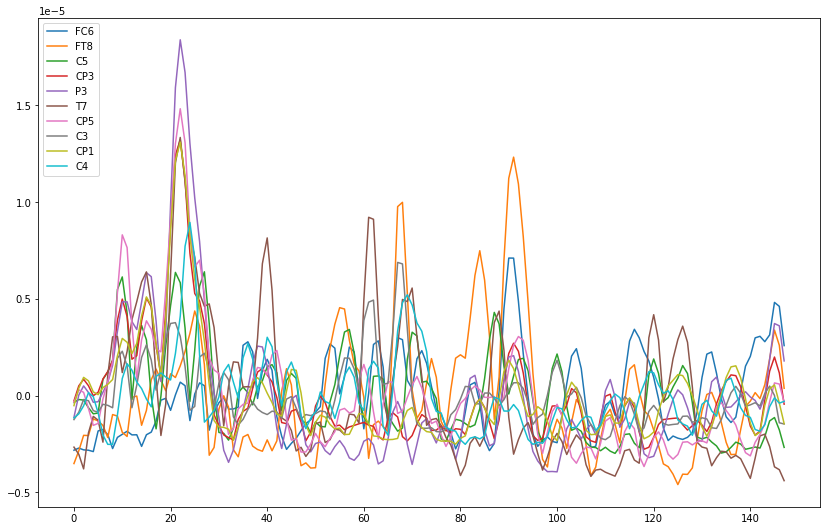

target_channels: ['FC6', 'FT8', 'C5', 'CP3', 'P3', 'T7', 'CP5', 'C3', 'CP1', 'C4']
<RawCNT | Acquisition 232 Data.cnt, 62 x 2477400 (2477.4 s), ~1.14 GB, data loaded>
knew
eeg data shape: (444, 310)
idx: 21
CUR ELECTRODE DATA: (444,)
444 444
idx: 22
CUR ELECTRODE DATA: (444,)
444 444
idx: 24
CUR ELECTRODE DATA: (444,)
444 444
idx: 35
CUR ELECTRODE DATA: (444,)
444 444
idx: 45
CUR ELECTRODE DATA: (444,)
444 444
idx: 23
CUR ELECTRODE DATA: (444,)
444 444
idx: 34
CUR ELECTRODE DATA: (444,)
444 444
idx: 25
CUR ELECTRODE DATA: (444,)
444 444
idx: 36
CUR ELECTRODE DATA: (444,)
444 444
idx: 29
CUR ELECTRODE DATA: (444,)
444 444


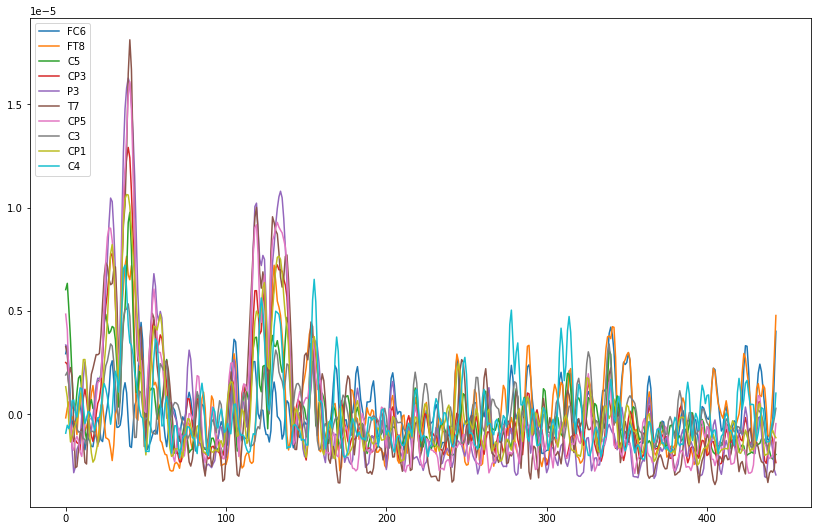

In [33]:
for i in range(1):
    plot_eeg("eeg_vocal_feats", target_channels, idx=i, feat=False)
    plot_eeg("eeg_active_feats", target_channels, idx=i, feat=False)
# target_channels

### Audio Visualisation

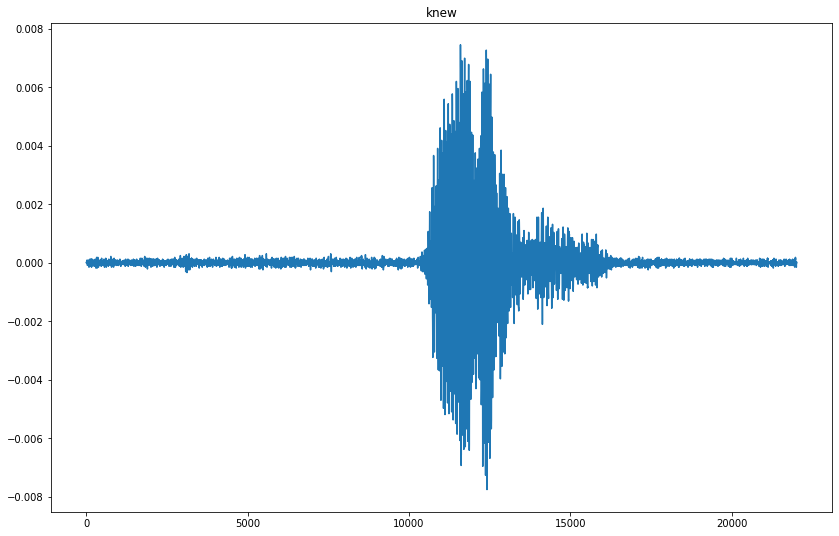

1.376


In [34]:
for i in range(1):
    example = dataset[i]
    plt.title(example["label"])
    plt.plot(example["audio_raw"])
    plt.show()
    print(len(example["audio_raw"]) / 16_000)

### Mel Spectrogram of Audio (Vocalised)

In [35]:
from matplotlib import cm

def plot_mel_spectrogram(mel_spec, title):
    fig, ax = plt.subplots(1)

    ax.set_title(f"Mel Spectogram \"{title}\"")
    pred = np.swapaxes(mel_spec, 0, 1)
    cax = ax.imshow(pred, interpolation='nearest', cmap=cm.coolwarm, origin='lower')

    return fig

(135, 128)


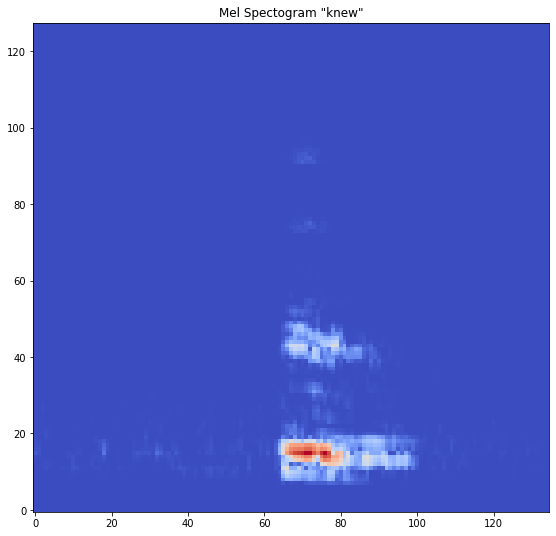

In [36]:
for i in [0]: # range(1):
    example_mel_spec = dataset[i]["audio_feats"]
    print(example_mel_spec.shape)
    plot_mel_spectrogram(example_mel_spec, dataset[i]["label"])

## Single Synthesis

### Single Sample Details

In [14]:
synth_example = dataset[len(dataset) - 1]
synth_example.keys()

dict_keys(['label', 'audio_raw', 'audio_feats', 'eeg_active', 'eeg_vocal', 'eeg_active_raw', 'eeg_vocal_raw', 'eeg_active_feats', 'eeg_vocal_feats'])

### Model

In [134]:
import torch
import random

from lib.transduction import DigitalVoicingModel

ins = 5 * 62 # 5 hand-crafted features * 62 electrodes
outs = 128 # n mels

device = "cuda" if torch.cuda.is_available() else "cpu"

seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

model = DigitalVoicingModel(
    ins=ins,
    model_size=128,
    n_layers=1,
    dropout=0.0,
    outs=outs).to(device)

In [135]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.cuda.amp.grad_scaler import GradScaler

import matplotlib.pyplot as plt

X = torch.tensor(synth_example["eeg_active_feats"]).to(device)
y = torch.tensor(synth_example["audio_feats"]).to(device)

# clip sizes to smallest of both
clip_len = min(X.shape[0], y.shape[0])

X = X[:clip_len, :]
Y = y[:clip_len, :]

X = torch.unsqueeze(X, 0)
y = torch.unsqueeze(y, 0)

optim = torch.optim.Adam(model.parameters())

amp = True

epochs = 10000

scaler = GradScaler()

criteria = nn.MSELoss()

pred_s = []
losses = []

for i in range(epochs):
    # optim.zero_grad()

    with torch.autocast(
        enabled=amp,
        dtype=torch.bfloat16,
        device_type=device):

        pred = model(X) 
        loss = criteria(pred, y)

        if i % 10 == 0:
            pred_s.append(pred.cpu().detach())
            losses.append(loss.item())

        # plt.plot(loss.item())

            print(i, loss.item())
    
    scaler.scale(loss).backward()
    scaler.step(optim)
    scaler.update()

0 130.84326171875
10 107.67951202392578
20 52.7114372253418
30 16.63515281677246
40 2.8587515354156494
50 0.7511916160583496
60 1.0174390077590942
70 0.8318790793418884
80 0.6315780878067017
90 0.5938779711723328
100 0.5864697098731995
110 0.5737687945365906
120 0.5640978813171387
130 0.5578271150588989
140 0.5484353303909302
150 0.5405780673027039
160 0.5364357233047485
170 0.5290143489837646
180 0.5231829285621643
190 0.5171988010406494
200 0.5117948055267334
210 0.5064713358879089
220 0.500532329082489
230 0.4955252707004547
240 0.4901249408721924
250 0.48565301299095154
260 0.48055559396743774
270 0.4763214588165283
280 0.47161996364593506
290 0.46710634231567383
300 0.46329593658447266
310 0.4590841829776764
320 0.4554034471511841
330 0.4516071677207947
340 0.44785770773887634
350 0.4441700279712677
360 0.44063860177993774
370 0.4374760389328003
380 0.43368613719940186
390 0.43085771799087524
400 0.42732736468315125
410 0.4242793917655945
420 0.42106860876083374
430 0.418544828891

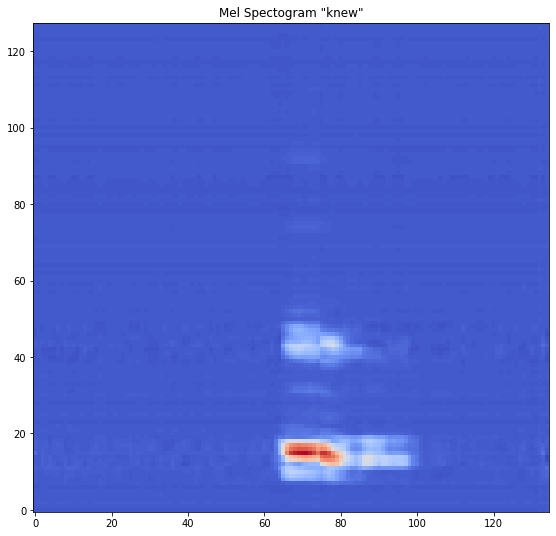

In [136]:
y = torch.squeeze(pred_s[len(pred_s) - 1], 0).float()
_ = plot_mel_spectrogram(y, "knew")

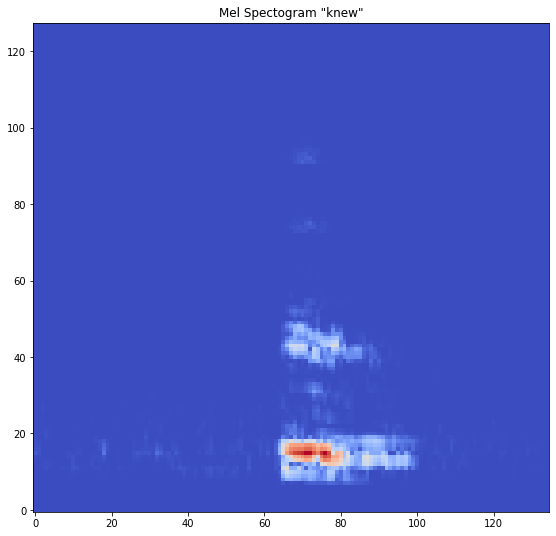

In [137]:
_ = plot_mel_spectrogram(example_mel_spec, dataset[0]["label"])